In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
ny_df = pd.read_csv('NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv', header=4)

for col in ny_df.columns:
    if col != "City":
        try:
            ny_df[col] = ny_df[col].str.replace(',', '')
        except:
            pass
    
for col in ny_df.columns:
    try:
        ny_df[col] = pd.to_numeric(ny_df[col])
    except:
        pass

In [16]:
ny_df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [17]:
ny_df.columns = ['city', 'population', 'violent_crime', 'murder_etc', 'rape', 'rape2', 'robbery', 'aggrevated_assault','property_crime', 'burglary', 'larceny_theft', 'vehicle_theft', 'arson3']

In [18]:
ny_df['murder_bin'] = [1 if ik>0 else 0 for ik in ny_df['murder_etc']]
ny_df['robbery_bin'] = [1 if ik>0 else 0 for ik in ny_df['robbery']]
ny_df['pop_sq'] = [ik**2 for ik in ny_df['population']]

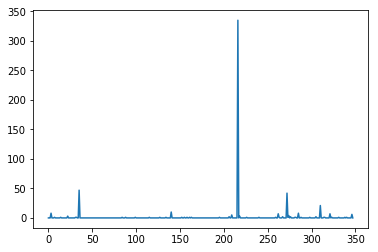

In [19]:
ny_df['murder_etc'].plot()

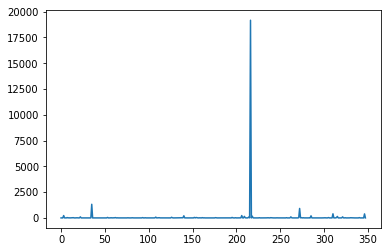

In [20]:
ny_df['robbery'].plot()

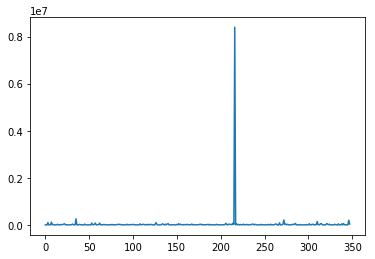

In [21]:
ny_df['population'].plot()

In [23]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

ny_df_sub = ny_df[['murder_bin', 'robbery_bin', 'pop_sq', 'property_crime']].dropna()

regr.fit(ny_df_sub[['murder_bin', 'robbery_bin', 'pop_sq']], ny_df_sub['property_crime'])
print('coefficients: ', regr.coef_, '\nintercept:', regr.intercept_ )

coefficients:  [  1.18417393e+03   3.00052399e+02   1.99252760e-09] 
intercept: 40.0770439392


In [28]:
ny_df.describe()

,population,violent_crime,murder_etc,rape,rape2,robbery,aggrevated_assault,property_crime,burglary,larceny_theft,vehicle_theft,arson3,murder_bin,robbery_bin,pop_sq
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000,351.000000,351.000000,3.480000e+02
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658,0.139601,0.595442,2.035547e+11
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411,0.347067,0.491507,3.778876e+12
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.766760e+05
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000,0.000000,0.000000,9.018117e+06
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000,0.000000,1.000000,5.232568e+07
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000,0.000000,1.000000,3.397536e+08
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000,1.000000,1.000000,7.049493e+13


In [89]:
ny_df2 = ny_df[ny_df.population<120000]

crime_cols2 = [ 'pop_sq', 'burglary','robbery_bin','murder_etc','murder_bin',
        'aggrevated_assault','vehicle_theft','rape2', 'arson3', 'property_crime']

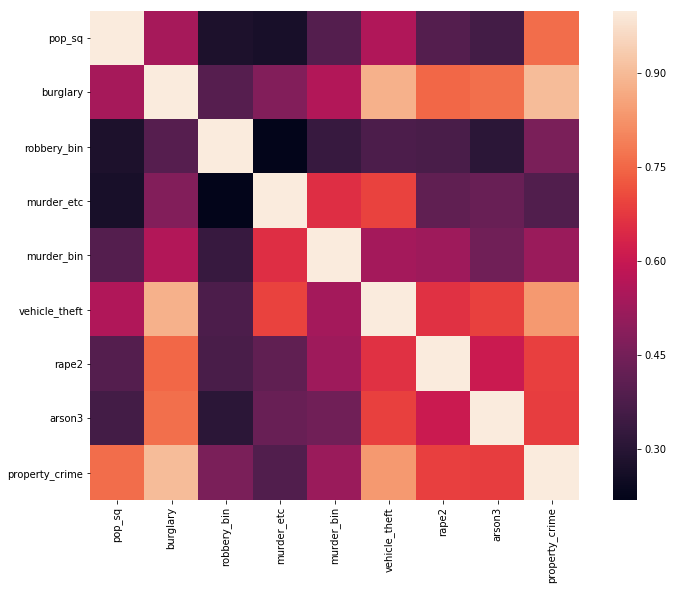

In [90]:
corrmat = ny_df2[crime_cols2].dropna().corr()
fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

In [91]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(ny_df2[crime_cols2])

ny_df_scaled = ny_df2[crime_cols2]
ny_df_scaled[crime_cols2] = scaler.fit_transform(ny_df_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/

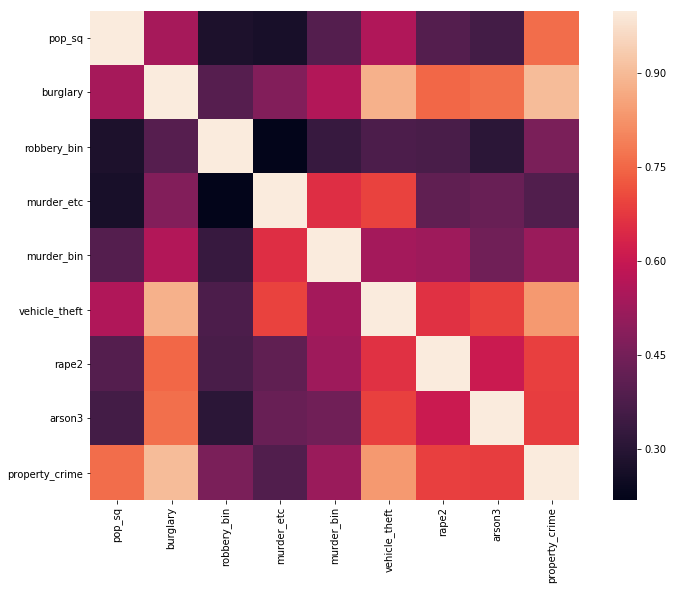

In [92]:
corrmat = ny_df_scaled.dropna().corr()
fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True)

In [93]:
target = 'property_crime'
crime_cols2.remove(target)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
regr = linear_model.LinearRegression()

In [98]:
print('scaled data')
ny_df_sub = ny_df_scaled[crime_cols2+[target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
regr.fit(X_train, y_train)
print('score:', regr.score(X_test, y_test))
    
for ik in range(len(crime_cols2)):
    temp = crime_cols2.pop(0)
    ny_df_sub = ny_df_scaled[crime_cols2+[target]].dropna()
    X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
    regr.fit(X_train, y_train)
    print('\nword: ', temp, '\nscore:', regr.score(X_test, y_test))
    crime_cols2.append(temp)
# print('coefficients: ', regr.coef_, '\nintercept:', regr.intercept_ )

scaled data
score: 0.914950044025

word:  pop_sq 
score: 0.780039002673

word:  burglary 
score: 0.905472850611

word:  robbery_bin 
score: 0.912985006067

word:  murder_etc 
score: 0.903392727169

word:  murder_bin 
score: 0.916813313562

word:  vehicle_theft 
score: 0.905017546897

word:  rape2 
score: 0.919782008903

word:  arson3 
score: 0.912825809166


In [100]:
print('unscaled')
ny_df_sub = ny_df2[crime_cols2+[target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
regr.fit(X_train, y_train)
print('score:', regr.score(X_test, y_test))
    
for ik in range(len(crime_cols2)):
    temp = crime_cols2.pop(0)
    ny_df_sub = ny_df_scaled[crime_cols2+[target]].dropna()
    X_train, X_test, y_train, y_test = train_test_split(ny_df_sub[crime_cols2], ny_df_sub[target], test_size=0.20, random_state=42)
    regr.fit(X_train, y_train)
    print('\nword: ', temp, '\nscore:', regr.score(X_test, y_test))
    crime_cols2.append(temp)

unscaled
score: 0.914950044025

word:  pop_sq 
score: 0.780039002673

word:  burglary 
score: 0.905472850611

word:  robbery_bin 
score: 0.912985006067

word:  murder_etc 
score: 0.903392727169

word:  murder_bin 
score: 0.916813313562

word:  vehicle_theft 
score: 0.905017546897

word:  rape2 
score: 0.919782008903

word:  arson3 
score: 0.912825809166


The model appears to perform the same with scaled and unscaled features.  I selected features based on the correlation heatmap and then testing the model against the set minus one feature for each feature in the set.  The resulting model returns r^2=.92 with the feature set:

['pop_sq','burglary','robbery_bin','murder_etc','murder_bin','vehicle_theft','arson3']